In [243]:
import json
import requests
import numpy as np
import pandas as pd
import base64
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import ipywidgets as widgets
from IPython.display import display
import re

#### Web Scraping

In [216]:
#Publicacion resultados: https://es.investing.com/equities/apple-computer-inc-earnings
url='https://investing.com/equities'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

#https://es.investing.com/equities/morehistory

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

table = soup.find_all('table',{'id':'cross_rate_markets_stocks_1'})


#table id="cross_rate_markets_stocks_1"

In [220]:
table2=table[0]

<table class="genTbl closedTbl crossRatesTbl elpTbl elp30" id="cross_rate_markets_stocks_1" tablesorter=""><thead><tr><th class="flag"> </th><th class="left noWrap elp">Name<span class="headerSortDefault" sort_default=""></span></th><th>Last</th><th>High</th><th>Low</th><th data-col-caption="Change">Chg.</th><th data-col-caption="Change %">Chg. %<span class="headerSortDefault" sort_default="" sortablecache=""></span></th><th data-col-caption="Vol">Vol.<span class="headerSortDefault" sort_default="" sortablecache=""></span></th><th data-col-caption="Time">Time<span class="headerSortDefault" sort_default="" sortablecache=""></span></th><th class="icon"></th></tr></thead><tbody><tr id="pair_240"><td class="flag"><span class="ceFlags USA" title="United States"> </span></td><td class="bold left noWrap elp plusIconTd"><a href="/equities/chevron" title="Chevron Corp">Chevron</a><span class="alertBellGrayPlus js-plus-icon genToolTip oneliner" data-id="240" data-name="Chevron Corp" data-tooltip

In [222]:
rows=table2.find_all('tr')
#rows=rows[1:]
rows[6]

<tr id="pair_252"><td class="flag"><span class="ceFlags USA" title="United States"> </span></td><td class="bold left noWrap elp plusIconTd"><a href="/equities/microsoft-corp" title="Microsoft Corporation">Microsoft</a><span class="alertBellGrayPlus js-plus-icon genToolTip oneliner" data-id="252" data-name="Microsoft Corporation" data-tooltip="Create Alert" data-volume="25,373,786"></span></td><td class="pid-252-last">185.35</td><td class="pid-252-high">185.41</td><td class="pid-252-low">182.65</td><td class="bold greenFont pid-252-pc">+1.64</td><td class="bold greenFont pid-252-pcp">+0.89%</td><td class="pid-252-turnover">23.15M</td><td class="pid-252-time" data-value="1581713999">14/02</td><td class="icon"><span class="redClockIcon isOpenExch-2"> </span></td></tr>

In [195]:
titles = [row.a.get('title') for row in rows]
links = [row.a.get('href') for row in rows]

Diccionario con todas las empresas del IBEX

In [196]:
dict_companies = { titles[i] : links[i] for i in range(len(titles)) }

In [197]:
companies_dropdown=widgets.Dropdown(options=titles,description='Company:')
companies_dropdown

Dropdown(description='Company:', options=('Chevron Corp', 'Citigroup Inc', 'Bank of America Corp', 'AT&T Inc',…

In [205]:
company_web=dict_companies.get(companies_dropdown.value)
company_web

'/equities/disney'

### CREAT WIDGET PARA SELECCIONAR EMPRESA DEL DICCIONARIO Y ASIGNAR A UNA VARIABLE

In [223]:
#Publicacion resultados: https://es.investing.com/equities/apple-computer-inc-earnings
url=f'https://investing.com{company_web}-earnings'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

#https://es.investing.com/equities/morehistory

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

In [224]:
table = soup.find_all('table',{'class':'genTbl openTbl ecoCalTbl earnings earningsPageTbl'})

In [232]:
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api

[]

In [267]:
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api = name_api[0].text.strip().split('\n')
name_api=re.findall('\((.*)\)',name_api[0])
name_api=name_api[0]
name_api

'DIS'

In [268]:
table2=table[0]

In [269]:
rows=table2.find_all('tr')
rows = [row.text.strip().split('\n') for row in rows]
rows =[list(filter(None,row)) for row in rows]

In [270]:
colnames = ['Date_publish','Period','BPA','PrevBPA','Revenue','PrevRevenue']
datos=rows
df=pd.DataFrame(datos[2:], columns=colnames)
df

,Date_publish,Period,BPA,PrevBPA,Revenue,PrevRevenue
0,"Feb 04, 2020",12/2019,1.53,/ 1.46,20.86B,/ 20.76B
1,"Nov 07, 2019",09/2019,1.07,/ 0.94,19.1B,/ 19.18B
2,"Aug 06, 2019",06/2019,1.35,/ 1.72,20.25B,/ 21.45B
3,"May 08, 2019",03/2019,1.61,/ 1.58,14.92B,/ 14.59B
4,"Feb 05, 2019",12/2018,1.84,/ 1.54,15.3B,/ 15.16B


In [271]:
df['Date_publish']=pd.to_datetime(df['Date_publish']).dt.date
df['Period']='30/'+df['Period']
df['Period']=pd.to_datetime(df['Period']).dt.date
df=df.replace('[,]', '.', regex=True)
df['PrevBPA']=df['PrevBPA'].replace('/', '', regex=True)
df['Revenue']=df['Revenue'].replace('[A-Z]', '', regex=True).astype(float)
df['PrevRevenue']=df['PrevRevenue'].replace('/', '', regex=True)
df['PrevRevenue']=df['PrevRevenue'].replace('[A-Z]', '', regex=True).astype(float)
df

,Date_publish,Period,BPA,PrevBPA,Revenue,PrevRevenue
0,2020-02-04,2019-12-30,1.53,1.46,20.86,20.76
1,2019-11-07,2019-09-30,1.07,0.94,19.10,19.18
2,2019-08-06,2019-06-30,1.35,1.72,20.25,21.45
3,2019-05-08,2019-03-30,1.61,1.58,14.92,14.59
4,2019-02-05,2018-12-30,1.84,1.54,15.30,15.16


### API

In [272]:
#https://financialmodelingprep.com/developer/docs/companies-key-stats-free-api/#Python

#'https://financialmodelingprep.com/api/v3/historical-price-full/AAPL'


url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{name_api}'
response = requests.get(url)



In [273]:
result=response.json()
result
data=pd.DataFrame(json_normalize(result))

In [274]:
#data['historical'][0]

In [275]:
data2=json_normalize(data['historical'][0])
data2

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2015-02-17,104.23,104.45,103.57,104.12,97.62,4759300.0,4759300.0,0.11,0.106,104.04667,"February 17, 15",0.00106
1,2015-02-18,103.40,104.33,103.40,103.86,97.38,3760200.0,3760200.0,-0.46,-0.445,103.86333,"February 18, 15",-0.00445
2,2015-02-19,104.00,104.08,103.55,103.89,97.41,5094100.0,5094100.0,0.11,0.106,103.84000,"February 19, 15",0.00106
3,2015-02-20,103.86,104.69,102.73,104.55,98.03,5197000.0,5197000.0,-0.69,-0.664,103.99000,"February 20, 15",-0.00664
4,2015-02-23,104.76,105.23,104.44,104.99,98.44,5587100.0,5587100.0,-0.23,-0.220,104.88667,"February 23, 15",-0.00220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-02-10,141.03,142.59,140.46,142.59,142.59,8162100.0,8162100.0,-1.56,-1.106,141.88000,"February 10, 20",-0.01106
1255,2020-02-11,142.85,142.99,140.46,141.01,141.01,10790100.0,10790100.0,1.84,1.288,141.48667,"February 11, 20",0.01288
1256,2020-02-12,141.34,142.22,140.87,141.85,141.85,8168200.0,8168200.0,-0.51,-0.361,141.64667,"February 12, 20",-0.00361
1257,2020-02-13,141.17,141.90,140.82,140.90,140.90,7543100.0,7543100.0,0.27,0.191,141.20667,"February 13, 20",0.00191


In [276]:
data3=data2[['date','open','close','volume','change','changePercent','vwap']]
data3['date']=pd.to_datetime(data3['date']).dt.date

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [277]:
data3.head(5)

,date,open,close,volume,change,changePercent,vwap
0,2015-02-17,104.23,104.12,4759300.0,0.11,0.106,104.04667
1,2015-02-18,103.40,103.86,3760200.0,-0.46,-0.445,103.86333
2,2015-02-19,104.00,103.89,5094100.0,0.11,0.106,103.84000
3,2015-02-20,103.86,104.55,5197000.0,-0.69,-0.664,103.99000
4,2015-02-23,104.76,104.99,5587100.0,-0.23,-0.220,104.88667


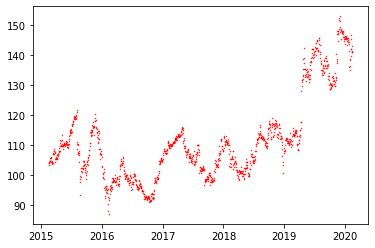

In [278]:
plt.scatter(data3['date'], data3['open'], s =0.2, c = 'red')

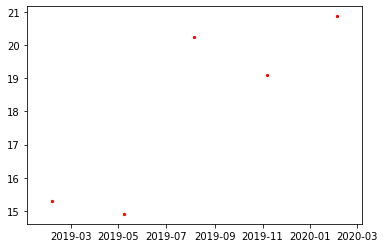

In [279]:
plt.scatter(df['Date_publish'], df['Revenue'], s =5, c = 'red')

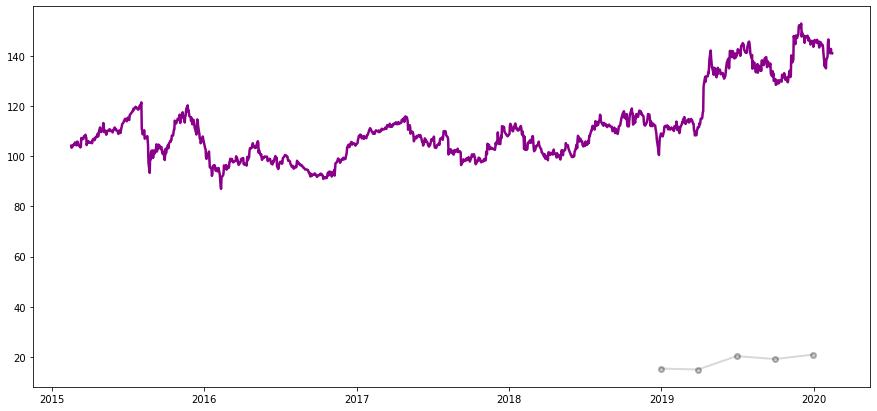

In [280]:
# Requirement 1
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,7))
ax.plot(data3.date,data3.open,
       linewidth=2.5,color='darkmagenta',label=2014)

line = ax.plot(df.Period,df.Revenue,
       linewidth=2,
       color='grey',
       label=2013,
       alpha=0.3,
        marker = 'o', # full list of options here : https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
        markersize = 5,
        markeredgecolor = 'black',
        markeredgewidth = 2,

        # Set a name for the line : this is to be used when we have a legend in the graph
       );

